In [ ]:
pip install plotly==4.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy.random
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [ ]:
data = pd.read_csv("data.csv")
data_ano = pd.read_csv("data_by_year.csv")
data_genero = pd.read_csv("data_by_genres.csv")



In [ ]:
data_v1 = None
data_ano_v1 = None
data_genero_v1 = None
def load_everything():
  global data_v1
  global data_ano_v1
  global data_genero_v1
  data_v1 = data.copy()
  data_v1 = data_v1.drop(columns=["mode", "key", "explicit"])
  data_v1 = data_v1[data_v1.year >1999]

  data_ano_v1 = data_ano.copy()
  data_ano_v1 = data_ano.drop(columns=["mode", "key"])
  data_ano_v1 = data_ano_v1[data_ano_v1.year >1999]

  data_genero_v1 = data_genero.copy()
  data_genero_v1 = data_genero.drop(columns=["mode", "key"])

load_everything()

In [ ]:
data.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954


In [ ]:
data_ano_v1.head(1)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049


In [ ]:
data_genero_v1.head(1)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,160297.666667,0.071317,0.606834,0.3616,-31.514333,0.040567,75.3365,0.103783,27.833333


In [ ]:


fig = px.line(data_ano_v1, x='year', y='loudness', title = "Variação do loudness conforme os anos")

fig.show()

In [ ]:





fig = go.Figure()

fig.add_trace(go.Scatter(x=data_ano_v1.year, y=data_ano_v1.acousticness, name="acousticness"))
fig.add_trace(go.Scatter(x=data_ano_v1.year, y=data_ano_v1.valence, name="Valência"))
fig.add_trace(go.Scatter(x=data_ano_v1.year, y=data_ano_v1.danceability, name="danceability"))
fig.add_trace(go.Scatter(x=data_ano_v1.year, y=data_ano_v1.energy, name="energy"))
fig.add_trace(go.Scatter(x=data_ano_v1.year, y=data_ano_v1.instrumentalness, name="instrumentalness"))
fig.add_trace(go.Scatter(x=data_ano_v1.year, y=data_ano_v1.liveness, name="liveness"))
fig.add_trace(go.Scatter(x=data_ano_v1.year, y=data_ano_v1.speechiness, name="speechiness"))





In [ ]:

corr = data_v1.corr()
x = list(corr.columns)
y = list(corr.index)
z = np.array(corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show()

There is a +0.74 correlation between loudness and energy, and -0.71 between acousticness and energy.

In [ ]:
data_genero_v2 = data_genero_v1.drop('genres', axis=1)

PCA: Principal Component Analysis
Reduces dimensions to x and y so we can use it in our Clusters.

It attempts to keep the most relevant correlations

In [ ]:

seed =1224
numpy.random.seed(seed)
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

data_genero_v3 = pca_pipeline.fit_transform(data_genero_v2)

In [ ]:
projection = pd.DataFrame(columns=['x', 'y'], data=data_genero_v3)
kmeans_pca = KMeans(n_clusters=7, random_state= seed)
#, verbose=True
kmeans_pca.fit(projection)
prediction = kmeans_pca.predict(projection)
data_genero['cluster_pca'] = prediction
projection['cluster_pca'] = prediction
projection['generos'] = data_genero['genres']

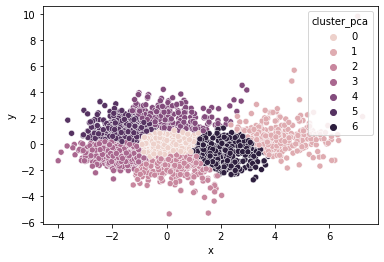

In [ ]:

sns.scatterplot(x='x', y='y', hue='cluster_pca', data=projection)

## Cluster For All Values

In [ ]:

projection_test = pd.DataFrame({"x": [], 'y': []})

for x in range(-40, 100):
  for y in range(-60, 100):
    projection_test = projection_test.append({'x': x/10, 'y': y/10}, ignore_index=True)


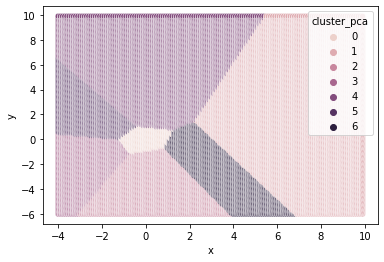

In [ ]:

prediction_test = kmeans_pca.predict(projection_test)
projection_test['cluster_pca'] = prediction_test
sns.scatterplot(x='x', y='y', hue='cluster_pca', data=projection_test)

In [ ]:
artists = []

for artist_group in data['artists']:
  if type(artist_group) is str:
    artist_group = [artist_group]
  artists.append([artist_group[0]])

In [ ]:
np.array(artists).ndim

2

In [ ]:


data_v2 = data.drop("artists", axis=1)[0:100]

ohe = OneHotEncoder(dtype=int)

colunas_ohe = ohe.fit_transform(artists[0:100]).toarray()
data_musicas_dummie = pd.concat([data_v2,
                                 pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)


In [ ]:
data_v2_2 = data.drop("artists", axis=1)[100:300]

ohe2 = OneHotEncoder(dtype=int)

colunas_ohe2 = ohe2.fit_transform(artists[100:300]).toarray()
data_musicas_dummie2 = pd.concat([data_v2_2,
                                 pd.DataFrame(colunas_ohe2, columns=ohe2.get_feature_names_out(['artists']))], axis=1)


,valence,year,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,"artists_['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']","artists_['Sergei Rachmaninoff', 'Michael Tilson Thomas', 'Barry Douglas', 'London Symphony Orchestra']","artists_['Sergei Rachmaninoff', 'Ruth Laredo']","artists_['Sergei Rachmaninoff', 'Yuri Temirkanov', 'St. Petersburg Philharmonic Orchestra']","artists_['Sergei Rachmaninoff', 'Zubin Mehta', 'Vladimir Feltsman', 'Israel Philharmonic Orchestra']",artists_['Sergei Rachmaninoff'],artists_['THE GUY'],artists_['Thomas Hallsten Paine'],"artists_['Wolfgang Amadeus Mozart', 'Arturo Toscanini']",artists_['Zay Gatsby']
0,0.0594,1921,0.982,0.279,831667,0.2110,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,...,1,0,0,0,0,0,0,0,0,0
1,0.9630,1921,0.732,0.819,180533,0.3410,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,...,0,0,0,0,0,0,0,0,0,0
2,0.0394,1921,0.961,0.328,500062,0.1660,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,...,0,0,0,0,0,0,0,0,0,0
3,0.1650,1921,0.967,0.275,210000,0.3090,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,...,0,0,0,0,0,0,0,0,0,0
4,0.2530,1921,0.957,0.418,166693,0.1930,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.1730,1921,0.992,0.380,170240,0.1170,0,3tEwdlwf8ZrxpksJorI5Tc,0.000001,7,...,0,0,0,0,0,0,0,0,0,0
96,0.2190,1921,0.672,0.403,396356,0.3850,0,47LO5zrjx6ShMymLqp80ef,0.000339,11,...,0,0,0,0,0,0,0,0,0,0
97,0.9190,1921,0.959,0.829,153827,0.3330,0,4BWXQSxvAa73YTLVLlMtGp,0.000362,5,...,0,0,0,0,0,0,0,0,0,0
98,0.4510,1921,0.995,0.592,168053,0.0322,0,4Rv29R4ydhHN9tYPfrZxTz,0.057300,5,...,0,0,0,0,0,0,0,0,0,0
